In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D

from keras.utils import np_utils
from matplotlib import pyplot as plt
import os
import random
import cv2
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [ ]:
#@title
import tensorflow as tf
# Load the video file
import cv2

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(200, activation='softmax')
])


In [ ]:
#@title
from keras.layers import Input, Conv2D, concatenate, Dense, UpSampling2D
from keras.models import Model
import tensorflow as tf
# Input layer for RGB image
rgb_input = Input(shape=(224, 224, 3))

# Convolutional layers for RGB image
rgb_conv1 = Conv2D(32, 3, activation='relu', padding = 'same')(rgb_input)
rgb_pool1 = MaxPooling2D(2)(rgb_conv1)
rgb_conv2 = Conv2D(64, 3, activation="relu", padding='same')(rgb_pool1)
rgb_pool2 = MaxPooling2D(2)(rgb_conv1)




# Concatenate the output of the two streams
merged = rgb_pool2

merged = Flatten()(merged)
# Final dense layer for classification
fcn1 = Dense(512, activation="relu")(merged)
output = Dense(200, activation='softmax')(fcn1)

# Create the model
model = Model(inputs=[rgb_input], outputs=output)


In [3]:
import os
import numpy as np
dirs = os.listdir('drive/My Drive')

def get_label(sub):
  gt = os.path.join(f'drive/My Drive/subject{sub}/ground_truth.txt')
  gtfilename = gt
  gtdata = np.loadtxt(gtfilename)
  gtTrace = gtdata[0,:].T
  gtTime = gtdata[2,:].T
  gtHR = gtdata[1,:].T
  return gtHR

def get_data(sub, off):
    images = []
    labels = []
  
    cap = cv2.VideoCapture(f"drive/My Drive/subject{sub}/vid.avi")
    # Loop through the video frames
    
    X_video = np.zeros((100, 64, 64, 3), dtype=np.uint8)
    y_video = np.zeros((100, 1))
    labels = get_label(sub)
    for i in range(off*100):
        ret, frame = cap.read()
    for i in range(100):
        ret, frame = cap.read()
        if ret == True:
            frame = cv2.resize(frame, (64,64))
            X_video[i, :, :, :] = frame
            y_video[i, 0] = labels[off*100+i]
        else:
          break
    return X_video, y_video
import pandas as pd
def DenseToSparse(labels):
    labels = pd.Series(labels).apply(lambda c:(int)(c))
    labels = labels.astype(np.ubyte)
    sparse_labels = np.zeros((labels.shape[0],150))
    sparse_labels[labels.index,labels] = 1
    return sparse_labels


In [ ]:
images = []
labels = []
i=0
for sub in range(50):
    print("counter: ", sub)
    if(dirs.count(f'subject{sub}')==0):
      print(sub)
      continue
    for off in range(12):  
      img, label = get_data(sub, off)
      images.append(img)
      labels.append(label)
sparse_labels = DenseToSparse(labels)

counter:  0
0
counter:  1
counter:  2
2
counter:  3
counter:  4
counter:  5
counter:  6
6
counter:  7
7
counter:  8
counter:  9
counter:  10
counter:  11
counter:  12
counter:  13
counter:  14
counter:  15
counter:  16
counter:  17
counter:  18
counter:  19
19
counter:  20
counter:  21
21
counter:  22
counter:  23
counter:  24
counter:  25
counter:  26
counter:  27
counter:  28
28
counter:  29
29
counter:  30
counter:  31
counter:  32
counter:  33
counter:  34
counter:  35
counter:  36
counter:  37
counter:  38
counter:  39
counter:  40
counter:  41
counter:  42
counter:  43
counter:  44
44
counter:  45
counter:  46
counter:  47
counter:  48
48
counter:  49


In [4]:
np.save('data_hr.npy', images)
np.save('labels_hr.npy', labels)

NameError: ignored

In [5]:
images = np.load('drive/My Drive/hr_data/data_hr.npy')
labels = np.load('drive/My Drive/hr_data/labels_hr.npy')

In [115]:
images = np.array(images)
#labels = np.array(labels)

In [6]:
print(images.shape)

(480, 100, 64, 64, 3)


In [ ]:
#@title
split = int(0.85* images.shape[0])
X_train = images[:split, :, :, :, np.newaxis]
y_train = labels[:split, :]
X_test = images[split:, :, :, :, np.newaxis]
y_test = labels[split:, :]

In [ ]:
#@title
import tensorflow as tf
# Load the video file
import cv2

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(200, activation='softmax')
])


In [7]:
import tensorflow as tf
def create_model():
  # Define the model
  model = tf.keras.Sequential()

  # 1st Conv3D layer
  model.add(tf.keras.layers.Conv3D(32, kernel_size=(3, 3, 3), activation='relu', 
                                  input_shape=(100, 64, 64, 3)))
  model.add(tf.keras.layers.MaxPool3D(pool_size=(2, 2, 2)))

  # 2nd Conv3D layer
  model.add(tf.keras.layers.Conv3D(64, kernel_size=(3, 3, 3), activation='relu'))
  model.add(tf.keras.layers.MaxPool3D(pool_size=(2, 2, 2)))

  # Flatten the output from the Conv3D layers
  model.add(tf.keras.layers.Flatten())

  # Add a fully connected layer
  model.add(tf.keras.layers.Dense(128, activation='relu'))

  # Add the output layer
  model.add(tf.keras.layers.Dense(1, activation='linear'))
  return model

models = [create_model() for i in range(5)]

# Compile the models
for model in models:
  # Compile the model
  model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])



In [6]:
from keras.layers import Input, Conv3D, MaxPooling3D, Flatten, Dense
from keras.models import Model

# First 3D CNN model
input1 = Input(shape=(100, 64, 64, 3))
x1 = Conv3D(32, (3, 3, 3), activation='relu')(input1)
x1 = MaxPooling3D(pool_size=(2, 2, 2))(x1)
x1 = Conv3D(64, (3, 3, 3), activation='relu')(x1)
x1 = MaxPooling3D(pool_size=(2, 2, 2))(x1)
x1 = Flatten()(x1)
x1 = Dense(128, activation='relu')(x1)
output1 = Dense(1, activation='linear')(x1)

model1 = Model(inputs=input1, outputs=output1)
model1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Second 3D CNN model
input2 = Input(shape=(100, 64, 64, 3))
x2 = Conv3D(32, (3,3,3), activation='relu')(input2)
x2 = MaxPooling3D(pool_size=(2, 2, 2))(x2)
x2 = Conv3D(64, (3,3,3), activation='relu')(x2)
x2 = MaxPooling3D(pool_size=(2, 2, 2))(x2)
x2 = Conv3D(64, (3,3,3), activation='relu')(x2)
x2 = MaxPooling3D(pool_size=(2, 2, 2))(x2)
x2 = Flatten()(x2)
x2 = Dense(256, activation='relu')(x2)
output2 = Dense(1, activation='linear')(x2)

model2 = Model(inputs=input2, outputs=output2)
model2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Third 3D CNN model
input3 = Input(shape=(100, 64, 64, 3))
x3 = Conv3D(32, (3,3,3), activation='relu')(input3)
x3 = MaxPooling3D(pool_size=(2, 2, 2))(x3)
x3 = Conv3D(64, (3,3,3), activation='relu')(x3)
x3 = MaxPooling3D(pool_size=(2, 2, 2))(x3)
x3 = Flatten()(x3)
x3 = Dense(256, activation='relu')(x3)
output3 = Dense(1, activation='linear')(x3)

model3 = Model(inputs=input3, outputs=output3)
model3.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])



In [7]:
models = [model1, model2, model3]

In [127]:
print(y_train.shape)

(432, 100, 1)


In [ ]:
#@title
import numpy as np

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2], X_train.shape[3], X_train.shape[5]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2], X_test.shape[3], X_test.shape[5]))


In [8]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, random_state=0, shuffle=True)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size=0.20) # , random_state=40, shuffle=True)

In [9]:
histories = []
for model in models:
    history = model.fit(x_train, y_train, epochs=100, validation_data=(x_valid, y_valid), batch_size = 32)
    histories.append(history)
# Create the ensemble model
ensemble_model = tf.keras.models.Model(inputs=models[0].input, outputs=[model.output for model in models])
# Compile the ensemble model
ensemble_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# preds = ensemble_model.predict(X_test)
# preds = sum(preds) / len(preds)

Epoch 1/100
14/14 [==============================] - 15s 679ms/step - loss: 13844966.0000 - mae: 1264.5616 - val_loss: 2034.8748 - val_mae: 38.5188
Epoch 2/100
14/14 [==============================] - 7s 533ms/step - loss: 970.3949 - mae: 23.9754 - val_loss: 696.0662 - val_mae: 21.0073
Epoch 3/100
14/14 [==============================] - 8s 542ms/step - loss: 366.2975 - mae: 13.4449 - val_loss: 463.7634 - val_mae: 15.3872
Epoch 4/100
14/14 [==============================] - 8s 543ms/step - loss: 319.4406 - mae: 12.1852 - val_loss: 393.8040 - val_mae: 12.9685
Epoch 5/100
14/14 [==============================] - 7s 534ms/step - loss: 269.4378 - mae: 10.4255 - val_loss: 366.8214 - val_mae: 12.0709
Epoch 6/100
14/14 [==============================] - 7s 533ms/step - loss: 242.0685 - mae: 9.1262 - val_loss: 337.7616 - val_mae: 13.5815
Epoch 7/100
14/14 [==============================] - 7s 526ms/step - loss: 249.5623 - mae: 10.2669 - val_loss: 421.8694 - val_mae: 12.8769
Epoch 8/100
14/14 [

NameError: ignored

In [10]:
from keras.layers import Average

ensemble_input = Input(shape=(100, 64, 64, 3))
model1_output = model1(ensemble_input)
model2_output = model2(ensemble_input)
model3_output = model3(ensemble_input)

# Average the outputs from the individual models
ensemble_output = Average()([model1_output, model2_output, model3_output])

# Create the ensemble model
ensemble_model = Model(inputs=ensemble_input, outputs=ensemble_output)
ensemble_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


In [ ]:
#@title
import tensorflow as tf

class ResidualFCN(tf.keras.Model):
    def __init__(self, num_classes=200):
        super(ResidualFCN, self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')
        self.conv2 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')
        self.residual = tf.keras.layers.Conv2D(64, 1, activation='relu', padding='same')
        self.pool = tf.keras.layers.MaxPool2D()
        self.upsample = tf.keras.layers.UpSampling2D()
        self.conv3 = tf.keras.layers.Conv2D(num_classes, 3, activation='relu', padding='same')

    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.conv2(x)
        r = self.residual(inputs)
        x = tf.keras.layers.add([x, r])
        x = self.pool(x)
        x = self.upsample(x)
        x = self.conv3(x)
        return x

model = ResidualFCN()


In [ ]:
#@title
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#@title
import tensorflow as tf

# Load the pre-trained model
model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False)

# Freeze the model layers
for layer in model.layers:
    layer.trainable = False

# Add a new classification head
x = model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
predictions = tf.keras.layers.Dense(200, activation='softmax')(x)

# Create the final model
model = tf.keras.models.Model(inputs=model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', metrics=['accuracy'])


In [11]:
ensemble_model.evaluate(x_test, y_test, batch_size=1)

10/10 [==============================] - 1s 24ms/step - loss: 17.1781 - mae: 3.0849


[17.178077697753906, 3.0848798751831055]

In [12]:
ensemble_model.save('/content/weights.h5')

In [21]:
print(x_train[0][1].shape)

(64, 64, 3)


(1, 100, 64, 64, 3)
1/1 [==============================] - 0s 17ms/step
[[97.23245]]
1/1 [==============================] - 0s 17ms/step
[[97.19885]]
1/1 [==============================] - 0s 23ms/step
[[97.3354]]
1/1 [==============================] - 0s 19ms/step
[[98.22783]]
1/1 [==============================] - 0s 19ms/step
[[122.87008]]
1/1 [==============================] - 0s 17ms/step
[[102.74983]]
1/1 [==============================] - 0s 18ms/step
[[113.778]]
1/1 [==============================] - 0s 17ms/step
[[90.96438]]
1/1 [==============================] - 0s 19ms/step
[[104.84182]]
1/1 [==============================] - 0s 19ms/step
[[92.80551]]
1/1 [==============================] - 0s 23ms/step
[[112.491356]]
1/1 [==============================] - 0s 17ms/step
[[107.94156]]
1/1 [==============================] - 0s 20ms/step
[[95.371735]]
1/1 [==============================] - 0s 19ms/step
[[102.29448]]
1/1 [==============================] - 0s 21ms/step
[[113.77472]

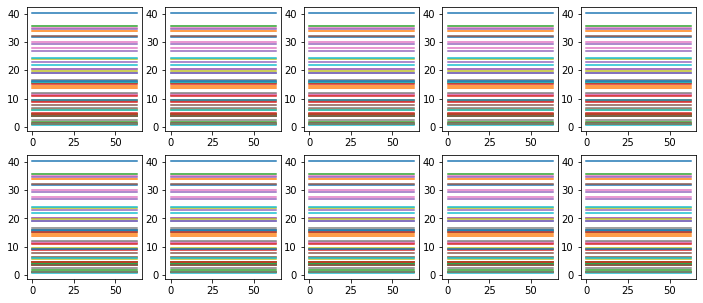

In [15]:
import tensorflow as tf
import numpy as np

# Load the trained 3D CNN model
model =ensemble_model

# Load the input data with 100 frames
input_data = x_train[2]
input_data = np.expand_dims(input_data, axis=0)
print(input_data.shape)
# Compute the initial prediction for the input data
prediction = model.predict(input_data)

# Initialize an occlusion map to store the results
occ_map = np.zeros(input_data.shape)

# Set the occlusion window size
window_size = 4

# Iterate over all frames in the input data
for i in range(input_data.shape[3] - window_size + 1):
    # Copy the input data into a new tensor
    occ_input = np.copy(input_data)
    
    # Set the occluded region to zeros
    occ_input[:,:,:,i:i+window_size,:] = 0
    
    # Compute the prediction for the occluded input
    occ_prediction = model.predict(occ_input)
    print(occ_prediction)
    # Compute the difference between the original prediction and the occluded prediction
    diff = prediction - occ_prediction
    
    # Store the difference in the occlusion map
    occ_map[:,:,:,i:i+window_size,:] = abs(diff)

# Visualize the occlusion map
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 5))

# Flatten the subplots array
ax = ax.flatten()

# Loop over the subplots
for i in range(10):
    # Plot the data in each subplot
    ax[i].plot(occ_map[0,i,:,:,0])

# Show the plot
plt.show()


1/1 [==============================] - 0s 18ms/step
[[74.01012]]
1/1 [==============================] - 0s 17ms/step
[[49.828255]]
1/1 [==============================] - 0s 16ms/step
[[98.08039]]
1/1 [==============================] - 0s 19ms/step
[[62.024086]]
1/1 [==============================] - 0s 20ms/step
[[93.38952]]
1/1 [==============================] - 0s 18ms/step
[[67.58592]]
1/1 [==============================] - 0s 16ms/step
[[133.93506]]
1/1 [==============================] - 0s 16ms/step
[[127.74656]]
1/1 [==============================] - 0s 18ms/step
[[119.437935]]
1/1 [==============================] - 0s 19ms/step
[[87.06257]]
1/1 [==============================] - 0s 19ms/step
[[104.89477]]
1/1 [==============================] - 0s 19ms/step
[[71.63802]]
1/1 [==============================] - 0s 16ms/step
[[93.25853]]
1/1 [==============================] - 0s 18ms/step
[[58.098732]]
1/1 [==============================] - 0s 19ms/step
[[126.45028]]
1/1 [===========

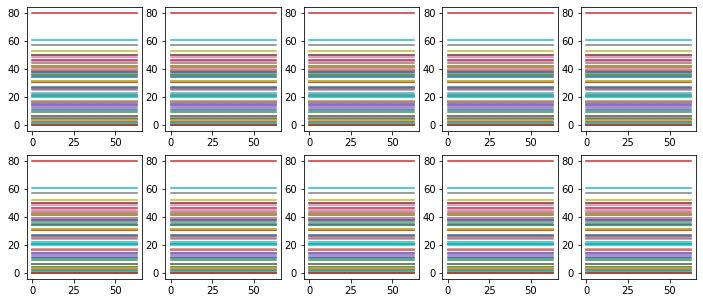

In [111]:
import tensorflow as tf
import numpy as np

# Load the trained 3D CNN model
model =models[0]

# Load the input data with 100 frames
input_data = x_train[130]
input_data = np.expand_dims(input_data, axis=0)

# Compute the initial prediction for the input data
prediction = model.predict(input_data)

# Initialize an occlusion map to store the results
occ_map = np.zeros(input_data.shape)

# Set the occlusion window size
window_size = 4

# Iterate over all frames in the input data
for i in range(input_data.shape[3] - window_size + 1):
    # Copy the input data into a new tensor
    occ_input = np.copy(input_data)
    
    # Set the occluded region to zeros
    occ_input[:,:,:,i:i+window_size,:] = 0
    
    # Compute the prediction for the occluded input
    occ_prediction = model.predict(occ_input)
    print(occ_prediction)
    # Compute the difference between the original prediction and the occluded prediction
    diff = prediction - occ_prediction
    
    # Store the difference in the occlusion map
    occ_map[:,:,:,i:i+window_size,:] = abs(diff)

# Visualize the occlusion map
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 5))

# Flatten the subplots array
ax = ax.flatten()

# Loop over the subplots
print(occ_map.shape)
for i in range(10):
    # Plot the data in each subplot
    ax[i].plot(occ_map[0,i,:,:,1])

# Show the plot
plt.show()


Streaming output truncated to the last 5000 lines.
71.06164
1/1 [==============================] - 0s 24ms/step
70.82564
1/1 [==============================] - 0s 17ms/step
78.41471
1/1 [==============================] - 0s 23ms/step
72.91667
1/1 [==============================] - 0s 21ms/step
85.91174
1/1 [==============================] - 0s 21ms/step
83.197235
1/1 [==============================] - 0s 18ms/step
83.426834
1/1 [==============================] - 0s 24ms/step
83.95645
1/1 [==============================] - 0s 19ms/step
88.33206
1/1 [==============================] - 0s 23ms/step
85.455376
1/1 [==============================] - 0s 17ms/step
87.997314
1/1 [==============================] - 0s 17ms/step
83.44247
1/1 [==============================] - 0s 18ms/step
91.805786
1/1 [==============================] - 0s 18ms/step
78.57506
1/1 [==============================] - 0s 18ms/step
83.92914
1/1 [==============================] - 0s 19ms/step
78.51143
1/1 [===============

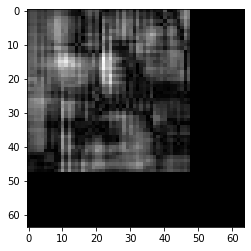

In [29]:
def generate_occlusion_map(input_tensor, model, patch_size, label):
    input_shape = input_tensor.shape
    print(input_shape)
    occlusion_map = np.zeros(input_shape[1:])
    for i in range(input_shape[1] - patch_size[0]):
        for j in range(input_shape[2] - patch_size[1]):
            for k in range(input_shape[3] - patch_size[2]):
                occlusion = input_tensor.copy()
                occlusion[:, i:i+patch_size[0], j:j+patch_size[1], k:k+patch_size[2]] = 0
                prediction = model.predict(occlusion[np.newaxis, ...])
                print(prediction[0][0])
                diff = abs(prediction[0][0]-label)
                occlusion_map[i, j, k] = diff
    return occlusion_map

# Use the function to generate an occlusion map with a patch size of (10, 10, 3)
print(y_train[0][0][0])
occlusion_map = generate_occlusion_map(x_train[0], ensemble_model, (16, 16, 1), y_train[0][0][0])
import matplotlib.pyplot as plt
print(occlusion_map.shape)
plt.imshow(occlusion_map[:,:,0], cmap='gray')
plt.show()


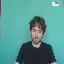

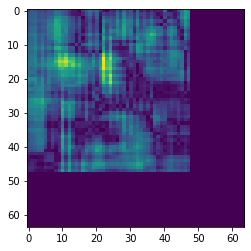

In [37]:
from google.colab.patches import cv2_imshow
cv2_imshow(x_train[0][0])
plt.imshow(occlusion_map[:,:,0])
plt.show()

In [ ]:
save_path = '/content/model2.h5'
try:
    history = model.fit(x_train, y_train, epochs=200, validation_data=(x_valid, y_valid), batch_size = 32)
except KeyboardInterrupt:
    model.save(save_path)
    print('Output saved to: "{}./*"'.format(save_path))

Epoch 1/200
14/14 [==============================] - 8s 556ms/step - loss: 40.1959 - mae: 3.1708 - val_loss: 203.5518 - val_mae: 6.7812
Epoch 2/200
14/14 [==============================] - 7s 528ms/step - loss: 41.7486 - mae: 3.3686 - val_loss: 178.8839 - val_mae: 6.5460
Epoch 3/200
14/14 [==============================] - 7s 536ms/step - loss: 37.4592 - mae: 3.0611 - val_loss: 188.1512 - val_mae: 6.6112
Epoch 4/200
14/14 [==============================] - 8s 546ms/step - loss: 38.4439 - mae: 3.0862 - val_loss: 179.1144 - val_mae: 6.6803
Epoch 5/200
14/14 [==============================] - 8s 546ms/step - loss: 37.7687 - mae: 3.0650 - val_loss: 187.8531 - val_mae: 7.2338
Epoch 6/200
14/14 [==============================] - 7s 530ms/step - loss: 38.1301 - mae: 3.2977 - val_loss: 179.5939 - val_mae: 6.7879
Epoch 7/200
14/14 [==============================] - 7s 530ms/step - loss: 38.3004 - mae: 3.1619 - val_loss: 201.2158 - val_mae: 6.8696
Epoch 8/200
14/14 [=============================

In [ ]:
model.save('/content/model_hr.h5')

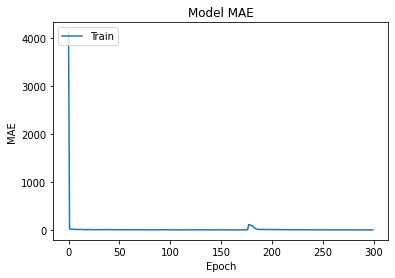

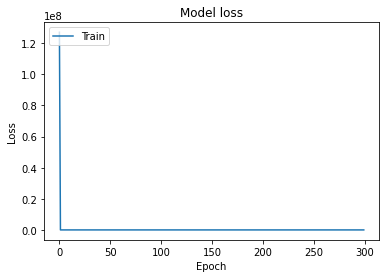

In [ ]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

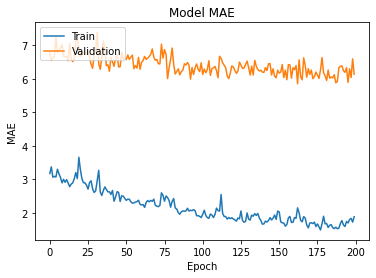

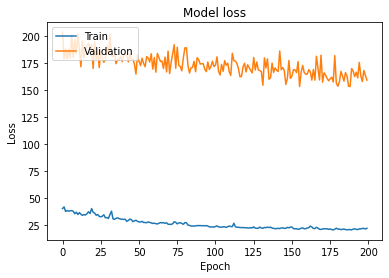

In [ ]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()